<a href="https://colab.research.google.com/github/Matias-Harper/Mi-Primer-Red-Neuronal/blob/main/Primera_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer Red Neuronal
Un código simple que muestra dos modelos de red neuronal que nos permita predecir el valor en grados Fahrenheit de temperaturas en grados Celsius     

link de doc con mayor detalle: https://docs.google.com/document/d/15V28xwcbBj6dXjSetev0afWn7YXddGSJADRn-UmSTFE/edit?usp=sharing

In [25]:
import tensorflow as tf
import numpy as np

Importamos las librerias necesarias para poder hacer la red neuronal

In [26]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahren = np.array([-40,14,32,46,59,72,100], dtype=float)

In [27]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [28]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error")

In [29]:
print("Comenzamos el entrenamiento del modelo")
historial = modelo.fit(celsius,fahren,epochs=1000, verbose=False)
print("fin de entrenamiento")

Comenzamos el entrenamiento del modelo
fin de entrenamiento


Ahora podemos ver el desempeño y caan cerca o lejos se contro en cada intento de los resultados aportados 

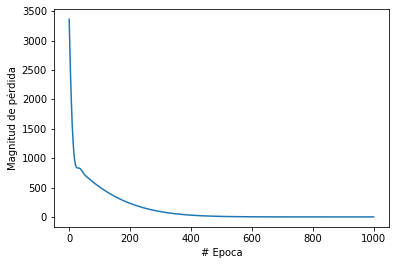

In [31]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Timpo de probar el modelo

In [32]:
print("Ahora realicemos una prediccion")
resultado = modelo.predict([100.0])
print("El resultado es ", resultado," Fahrenheit")

Ahora realicemos una prediccion
El resultado es  [[211.743]]  Fahrenheit


Vemos que el resultado es muy bueno utilizando solo una neurona. Ahora visualicemos como funciona internamente la red

In [9]:
print("variables internas de la red:")
print(capa.get_weights())

variables internas de la red:
[array([[1.7981755]], dtype=float32), array([31.925934], dtype=float32)]


#Mas capas y mas neuronas
ahora repetimos el modelo pero mas complejo
Agregamos dos capas intermedias con tres neuronas cada una

In [33]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahren = np.array([-40,14,32,46,59,72,100], dtype=float)

In [34]:
capa_mid1 = tf.keras.layers.Dense(units=3, input_shape=[1])
capa_mid2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo2 = tf.keras.Sequential([capa_mid1,capa_mid2,salida])

In [35]:
modelo2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error")

In [36]:
print("Comenzamos el entrenamiento del segundo modelo o modelo2")
historial2 = modelo2.fit(celsius,fahren,epochs=1000, verbose=False)
print("fin de entrenamiento")

Comenzamos el entrenamiento del segundo modelo o modelo2
fin de entrenamiento


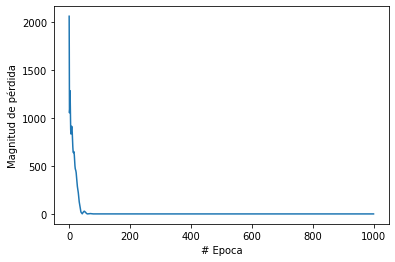

In [37]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial2.history["loss"])

In [38]:
print("Ahora realicemos una prediccion con el nuevo modelo")
resultado2 = modelo2.predict([100.0])
print("El resultado con el modelo2 es ", resultado2," Fahrenheit")

Ahora realicemos una prediccion con el nuevo modelo
El resultado con el modelo2 es  [[211.74744]]  Fahrenheit


In [39]:
print("variables internas de la red con mas neuronas:")
print(capa_mid1.get_weights())
print(capa_mid2.get_weights())
print(salida.get_weights())

variables internas de la red con mas neuronas:
[array([[ 0.5138823 , -0.4379657 , -0.04693897]], dtype=float32), array([ 4.051219 , -4.0629106, -3.720157 ], dtype=float32)]
[array([[-0.70207757,  0.841783  , -0.18701126],
       [-0.22695976, -1.409893  , -0.5868672 ],
       [-0.07241105, -0.7887267 ,  0.39306965]], dtype=float32), array([-3.6795304,  4.0291133,  2.028213 ], dtype=float32)]
[array([[-0.94481575],
       [ 1.4116579 ],
       [ 0.13763168]], dtype=float32), array([3.8824387], dtype=float32)]


Vemos que no podemos encontrarle una logica simple a estos valores, como podiamos hacer con las dos neuronas del modelo anterior